# ................................................Castro Brazila Inc................................................

# Case Study - Brazil Housing

# Business Objective: To figure out suitable cities, for relocation for bachelors, for mid-size families, and for large families.

# 

In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.shape

(10692, 13)

In [4]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [5]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [8]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    numerical = []
    for column in df.columns:               
        if df[column].nunique() < 40:       
                                                   
            categorical.append(column)
        else:
            numerical.append(column)
            
    return categorical, numerical 


categorical, numerical = seprate_data_types(df)
print(tabulate({'Categorical':categorical,'Numerical':numerical},headers=['Categorical','Numerical'],tablefmt="grid"))

+----------------+---------------------+
| Categorical    | Numerical           |
+================+=====================+
| city           | area                |
+----------------+---------------------+
| rooms          | hoa (R$)            |
+----------------+---------------------+
| bathroom       | rent amount (R$)    |
+----------------+---------------------+
| parking spaces | property tax (R$)   |
+----------------+---------------------+
| floor          | fire insurance (R$) |
+----------------+---------------------+
| animal         | total (R$)          |
+----------------+---------------------+
| furniture      |                     |
+----------------+---------------------+


## Bivariate Analysis 

In [9]:

df.drop(df[(df['city']=='São Paulo')|(df['city']=='Rio de Janeiro')].index,inplace=True)

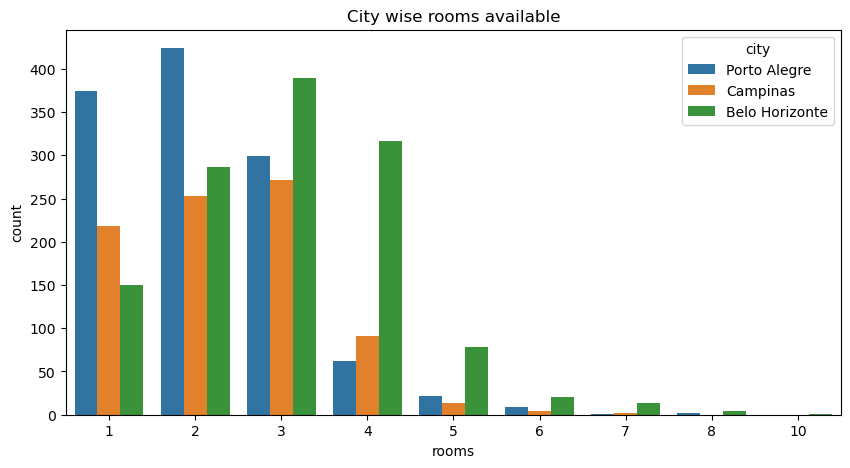

In [10]:
# City wise rooms available
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title('City wise rooms available')
sns.countplot(x='rooms',hue='city',data=df)
plt.show()

## Interpretation: The above visual shows that most of the cities are having houses with 2 rooms and among them 'Porto Alegre' has the highest number of houses with 2 rooms.

# 

## Multivariate analysis 

# Task 1: Identify the suitable cities for bachelors to rent a house in.


## Identifying cities for bachelors

For identifying rental houses for bachelors, 1 bedroom, 1 bathroom, no parking space and fully furnished parameters has bee considered for different cities.


###  Note: In the following analysis 'hoa', 'property tax' and 'fire insurance' has been considered as landlord's concern and not been included in the analysis.

In [11]:
df1=df[(df['rooms']==1)&(df['bathroom']==1)&(df['parking spaces']==0)&(df['furniture']=='furnished')&(df['city']=='Porto Alegre')]
df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
366,Porto Alegre,25,1,1,0,0,acept,furnished,286,984,11,15,1296
372,Porto Alegre,40,1,1,0,4,not acept,furnished,0,2000,0,30,2030
393,Porto Alegre,43,1,1,0,4,not acept,furnished,290,2100,66,31,2487
620,Porto Alegre,42,1,1,0,1,acept,furnished,360,890,0,13,1263
1366,Porto Alegre,42,1,1,0,3,acept,furnished,150,1050,0,16,1216
1550,Porto Alegre,32,1,1,0,0,acept,furnished,230,750,23,11,1014
1558,Porto Alegre,35,1,1,0,3,acept,furnished,200,880,15,13,1108
1570,Porto Alegre,38,1,1,0,4,acept,furnished,190,1800,20,27,2037
2008,Porto Alegre,28,1,1,0,1,acept,furnished,0,1340,4,20,1364
2264,Porto Alegre,40,1,1,0,3,acept,furnished,370,1084,46,16,1516


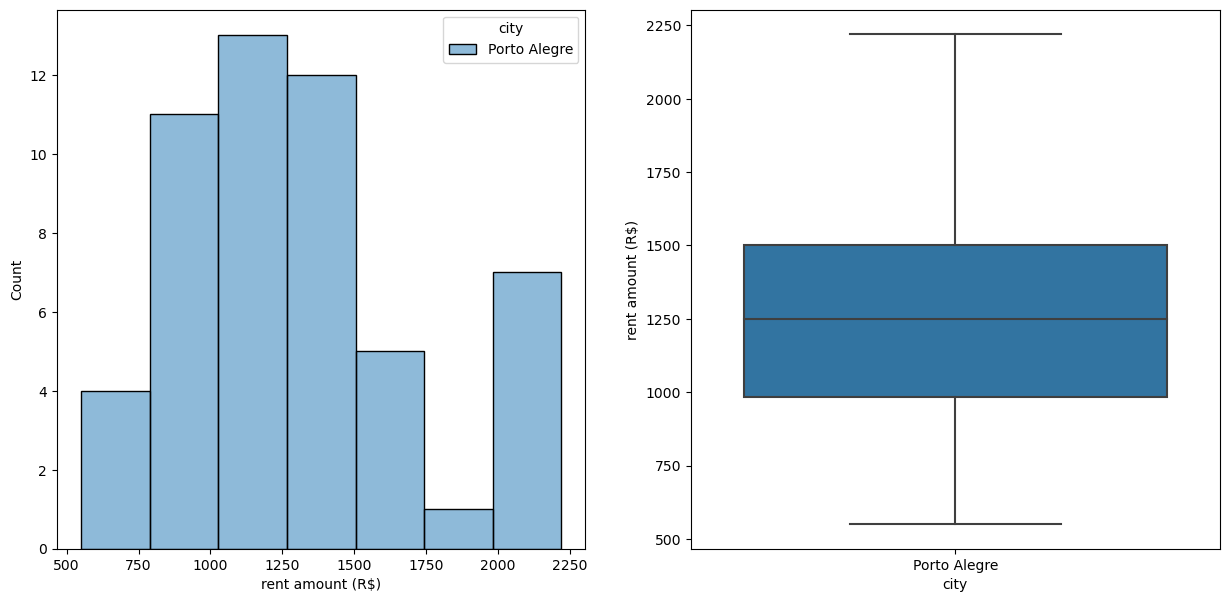

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df1["rent amount (R$)"], hue = df1["city"], ax = ax[0])
sns.boxplot(y = df1["rent amount (R$)"], x = df1["city"], ax = ax[1])
plt.show()

## Interpretation: The above visual shows that most of the single bedroom flats in 'Porto Alegre' are in the range of 750 to 1750.

In [13]:
df2=df[(df['rooms']==1)&(df['bathroom']==1)&(df['parking spaces']==0)&(df['furniture']=='furnished')&(df['city']=='Belo Horizonte')]
df2

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
73,Belo Horizonte,128,1,1,0,4,acept,furnished,418,2100,182,28,2728
340,Belo Horizonte,15,1,1,0,3,not acept,furnished,0,1100,0,15,1115
1692,Belo Horizonte,28,1,1,0,0,not acept,furnished,550,1100,0,15,1665
2601,Belo Horizonte,28,1,1,0,0,not acept,furnished,550,1100,0,15,1665
4110,Belo Horizonte,32,1,1,0,0,not acept,furnished,550,1250,0,17,1817
4384,Belo Horizonte,15,1,1,0,3,not acept,furnished,0,1100,0,15,1115
4609,Belo Horizonte,32,1,1,0,0,not acept,furnished,550,1300,0,18,1868
5686,Belo Horizonte,25,1,1,0,3,not acept,furnished,700,890,59,12,1661
6057,Belo Horizonte,27,1,1,0,1,not acept,furnished,0,1167,334,16,1517
6184,Belo Horizonte,22,1,1,0,1,not acept,furnished,0,700,0,10,710


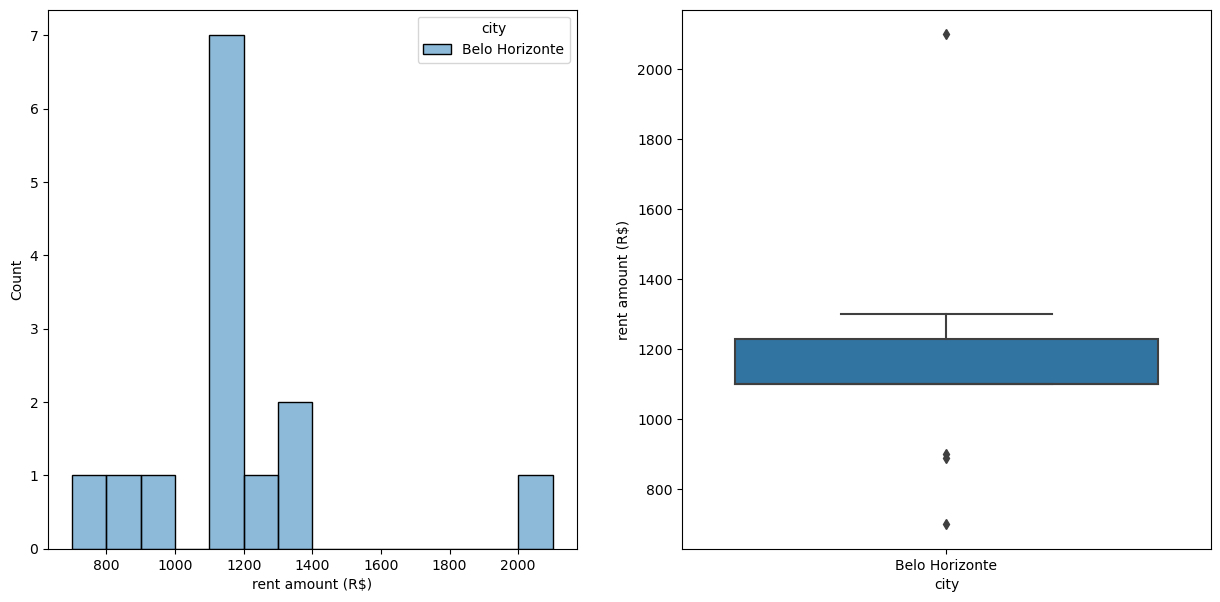

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df2["rent amount (R$)"], hue = df2["city"], ax = ax[0])
sns.boxplot(y = df2["rent amount (R$)"], x = df2["city"], ax = ax[1])
plt.show()

## Interpretation: The above visual shows that most of the single bedroom flats in 'Belo Horizonte' are in the range of 1200 to 1400.

In [15]:
df3=df[(df['rooms']==1)&(df['bathroom']==1)&(df['parking spaces']==0)&(df['furniture']=='furnished')&(df['city']=='Campinas')]
df3

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
136,Campinas,44,1,1,0,3,acept,furnished,350,916,12,12,1290
162,Campinas,24,1,1,0,1,not acept,furnished,230,1180,9,15,1434
1044,Campinas,28,1,1,0,0,not acept,furnished,0,1390,0,18,1408
1068,Campinas,47,1,1,0,1,acept,furnished,380,550,14,7,951
1916,Campinas,30,1,1,0,5,not acept,furnished,380,500,10,7,897
2797,Campinas,61,1,1,0,8,acept,furnished,378,1900,43,25,2346
4775,Campinas,46,1,1,0,5,acept,furnished,1300,1950,0,25,3275
4852,Campinas,44,1,1,0,8,acept,furnished,310,770,12,10,1102
5684,Campinas,47,1,1,0,10,not acept,furnished,580,750,0,10,1340
6094,Campinas,23,1,1,0,0,not acept,furnished,0,990,0,13,1003


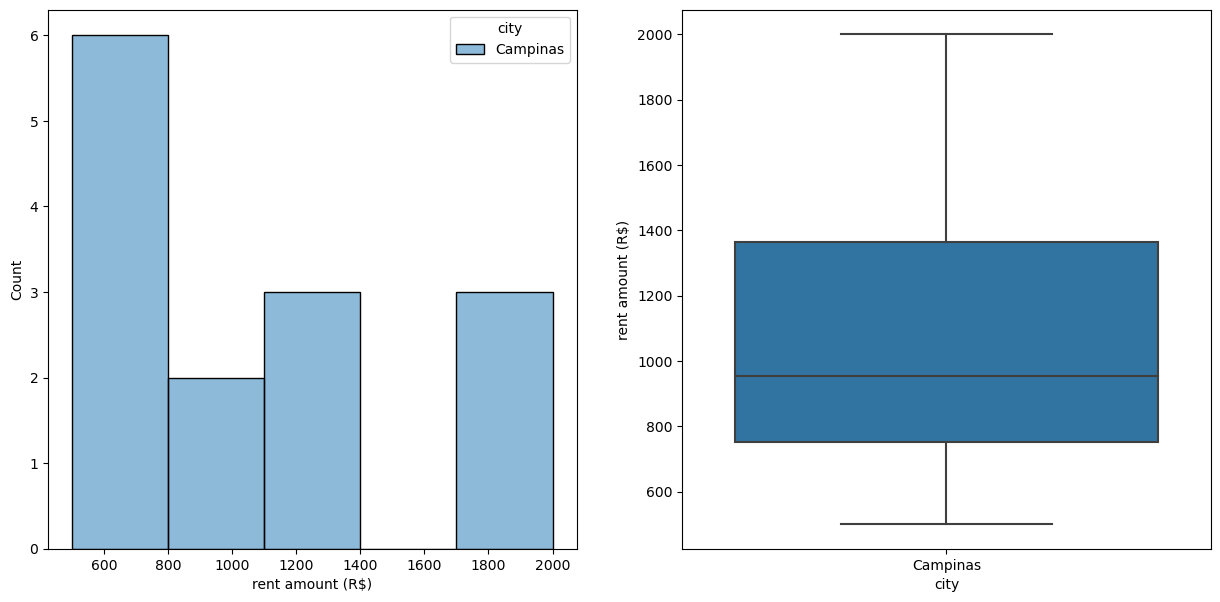

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df3["rent amount (R$)"], hue = df3["city"], ax = ax[0])
sns.boxplot(y = df3["rent amount (R$)"], x = df3["city"], ax = ax[1])
plt.show()

## Interpretation: The above visual shows that most of the single bedroom flats in 'Campinas' are in the range of 550 to 1440.

# Conclusion : Among the three cities the most suitable city for a bachalor is  'Porto Alegre' as the count of houses with 1 room, 1bathroom and fully furnished are more as compare to the other cities.


## 

# Task 2: Identify the suitable cities for mid-size families


For identifying rental houses for mid-size families, 2/3 bedroom, 2 bathroom, 1 parking space and fully furnished parameters has bee considered for different cities.

In [17]:
df4=df[(df['rooms'].isin([2,3]))&(df['bathroom']==2)&(df['parking spaces']==1)&(df['furniture']=='furnished')&(df['city']=='Porto Alegre')]
df4

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
790,Porto Alegre,110,2,2,1,3,acept,furnished,600,1800,152,27,2579
1025,Porto Alegre,62,2,2,1,7,not acept,furnished,800,3900,100,57,4857
1486,Porto Alegre,75,3,2,1,3,not acept,furnished,450,1950,98,29,2527
1767,Porto Alegre,109,3,2,1,2,acept,furnished,681,2423,193,36,3333
2144,Porto Alegre,92,2,2,1,2,acept,furnished,645,2100,2610,31,5386
2202,Porto Alegre,108,3,2,1,3,acept,furnished,826,2000,89,30,2945
2239,Porto Alegre,80,2,2,1,5,acept,furnished,740,1900,120,28,2788
2701,Porto Alegre,102,2,2,1,11,acept,furnished,1900,3000,259,44,5203
3458,Porto Alegre,120,2,2,1,3,acept,furnished,360,2525,75,37,2997
3461,Porto Alegre,73,2,2,1,6,acept,furnished,450,2450,94,36,3030


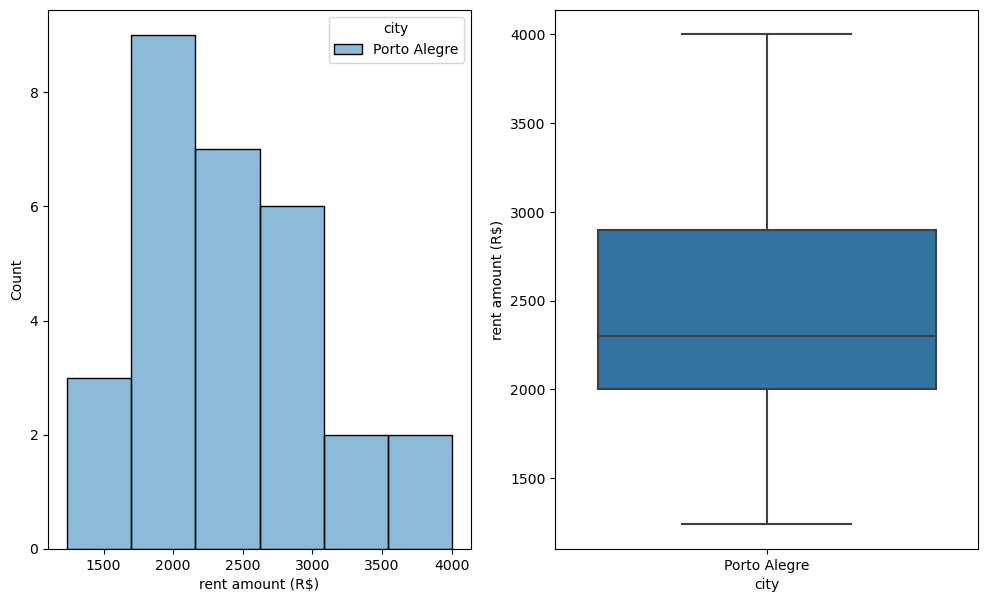

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.histplot(x = df4["rent amount (R$)"], hue = df4["city"], ax = ax[0])
sns.boxplot(y = df4["rent amount (R$)"], x = df4["city"], ax = ax[1])
plt.show()

## Interpretation: The above visual shows the most of the 2 and 3 room flats in Porto Alegre are in range 1500 to 3000

In [19]:
df5=df[(df['rooms'].isin([2,3]))&(df['bathroom']==2)&(df['parking spaces']==1)&(df['furniture']=='furnished')&(df['city']=='Belo Horizonte')]
df5

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
1966,Belo Horizonte,68,2,2,1,5,acept,furnished,1183,2500,207,34,3924
3553,Belo Horizonte,67,2,2,1,3,acept,furnished,400,1612,59,22,2093
4166,Belo Horizonte,80,2,2,1,4,acept,furnished,600,1500,109,20,2229
4393,Belo Horizonte,70,2,2,1,4,not acept,furnished,1355,4700,250,63,6368
5447,Belo Horizonte,120,3,2,1,2,acept,furnished,1083,2100,179,28,3390
5524,Belo Horizonte,68,3,2,1,1,acept,furnished,360,2250,95,30,2735
6621,Belo Horizonte,94,3,2,1,1,not acept,furnished,450,1900,125,26,2501
7005,Belo Horizonte,100,3,2,1,0,acept,furnished,100,2000,74,33,2207
7129,Belo Horizonte,140,3,2,1,11,not acept,furnished,1000,3300,184,44,4528


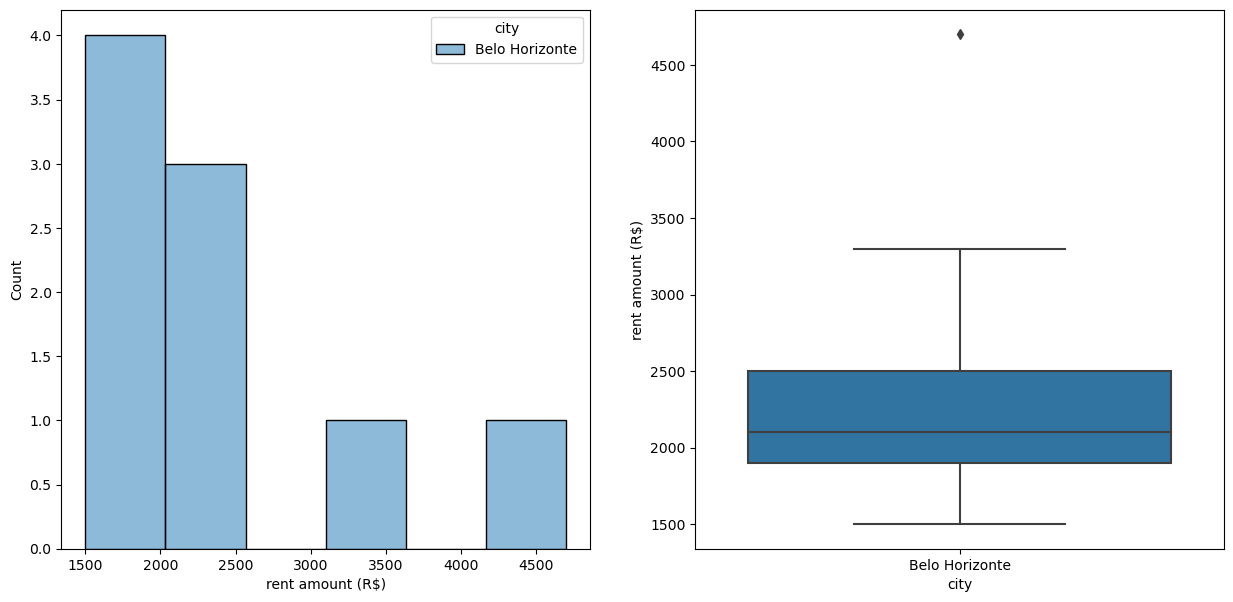

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df5["rent amount (R$)"], hue = df5["city"], ax = ax[0])
sns.boxplot(y = df5["rent amount (R$)"], x = df5["city"], ax = ax[1])
plt.show()

## Interpretation: The above visual shows the most of the 2 and 3 room flats in Belo Horizonte are in range 1500 to 2500.

In [21]:
df6=df[(df['rooms'].isin([2,3]))&(df['bathroom']==2)&(df['parking spaces']==1)&(df['furniture']=='furnished')&(df['city']=='Campinas')]
df6

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
1185,Campinas,151,2,2,1,8,acept,furnished,900,2000,262,26,3188
2861,Campinas,53,2,2,1,0,acept,furnished,443,1900,54,25,2422
3787,Campinas,80,2,2,1,1,acept,furnished,420,3000,107,39,3566
4645,Campinas,66,2,2,1,2,not acept,furnished,536,2270,76,29,2911
6280,Campinas,87,3,2,1,12,acept,furnished,870,1450,100,19,2439
7338,Campinas,85,3,2,1,3,not acept,furnished,500,1690,63,22,2275
9630,Campinas,80,2,2,1,8,acept,furnished,860,2000,34,26,2920
10093,Campinas,70,3,2,1,3,acept,furnished,650,1300,55,17,2022


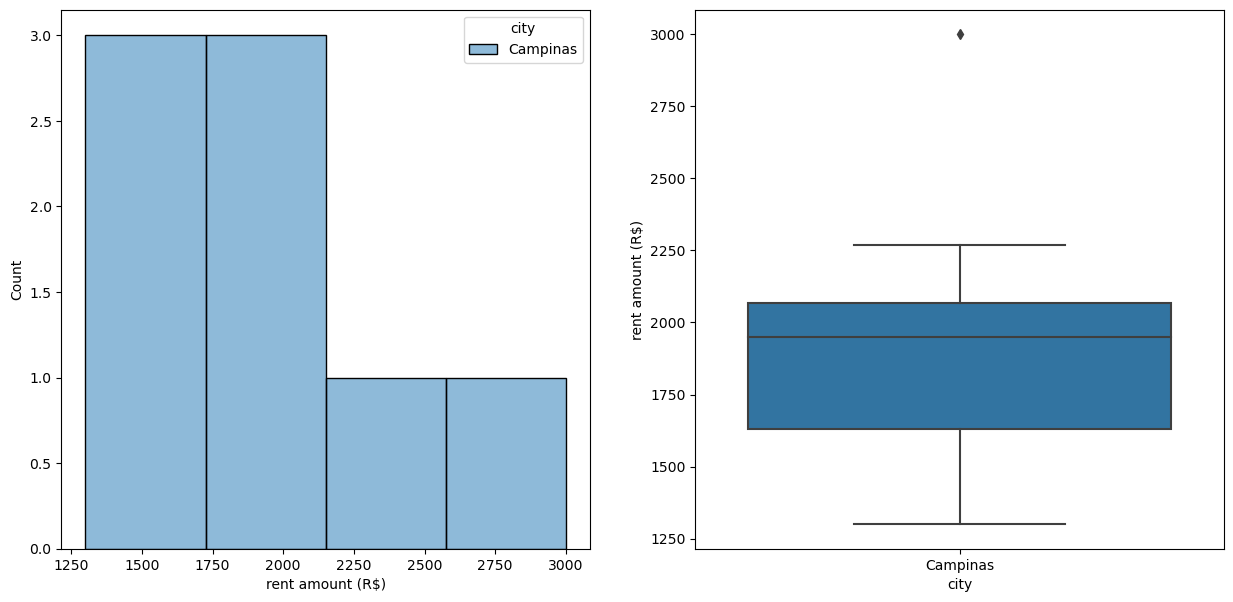

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df6["rent amount (R$)"], hue = df6["city"], ax = ax[0])
sns.boxplot(y = df6["rent amount (R$)"], x = df6["city"], ax = ax[1])
plt.show()

## Interpretation: The above visual shows the most of the 2 and 3 room flats in Campinas are in range 1250 to 2250

# Conclusion : Among the three cities the most suitable city for a mid-size family is  'Porto Alegre' as the count of houses with 2 or 3 rooms, 2 bathrooms, fully furnished and a parking space are more as compare to the other cities i.e, there are 9 houses approximately at a least rent of 1600.

## 

# Task 3: Identify the suitable cities for large-size families
For identifying rental houses for mid-size families, more than 3 bedroom, more than 2 bathroom, more than 1 parking space and fully furnished parameters has bee considered for different cities.

In [23]:
df7=df[(df['rooms'] > 3)&(df['bathroom'] >2)&(df['parking spaces']> 1)&(df['furniture']=='furnished')&(df['city']=='Porto Alegre')]
df7

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
91,Porto Alegre,350,4,4,4,0,acept,furnished,1,9000,359,160,9520
915,Porto Alegre,600,5,4,5,0,acept,furnished,0,12000,1167,214,13380
1255,Porto Alegre,450,5,4,4,0,acept,furnished,0,9000,250,160,9410
2966,Porto Alegre,281,4,3,4,0,acept,furnished,0,4950,442,88,5480
3244,Porto Alegre,180,4,5,3,9,acept,furnished,2500,10500,410,154,13560
4849,Porto Alegre,193,4,3,4,0,acept,furnished,0,4000,125,72,4197
5632,Porto Alegre,280,5,3,3,0,acept,furnished,0,4000,117,72,4189
6059,Porto Alegre,350,4,3,3,0,acept,furnished,0,4400,209,79,4688
6219,Porto Alegre,360,5,3,6,0,acept,furnished,0,4800,197,86,5083
6454,Porto Alegre,387,7,5,3,0,acept,furnished,0,6000,394,107,6501


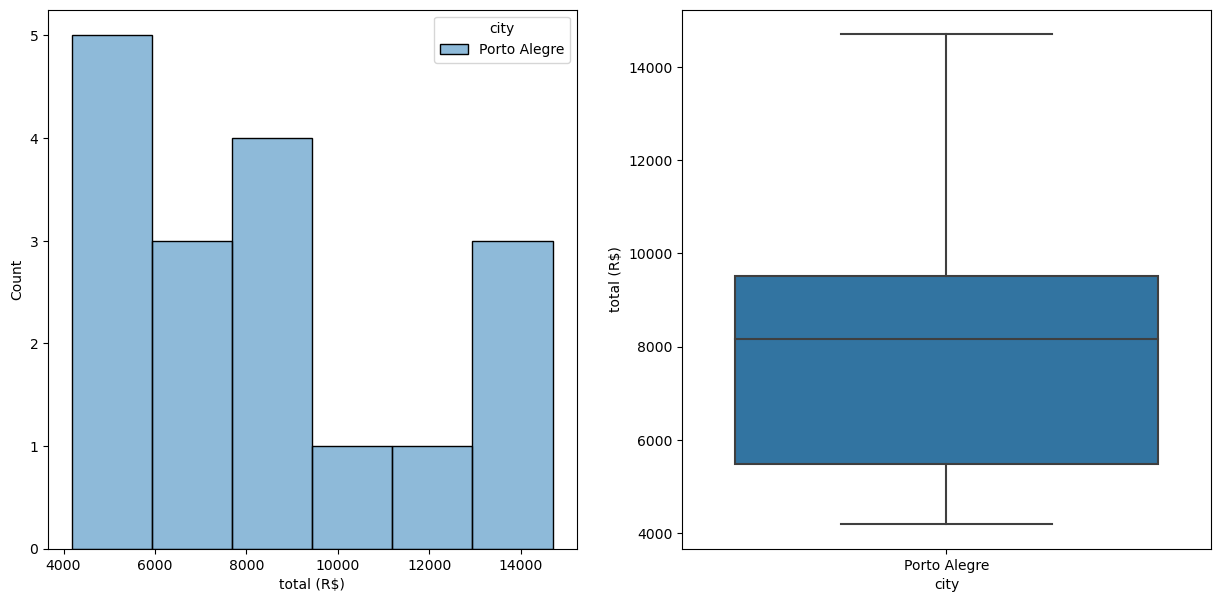

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df7["total (R$)"], hue = df7["city"], ax = ax[0])
sns.boxplot(y = df7["total (R$)"], x = df7["city"], ax = ax[1])
plt.show()

## Interpretation: The above visual shows the most of the flats with more than 3 rooms in 'Porto Alegre' are in range 4000 to 9000

In [25]:
df8=df[(df['rooms'] > 3)&(df['bathroom'] >2)&(df['parking spaces']> 1)&(df['furniture']=='furnished')&(df['city']=='Belo Horizonte')]
df8

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
346,Belo Horizonte,204,4,4,4,22,not acept,furnished,2701,10000,760,134,13600
538,Belo Horizonte,428,5,5,4,0,acept,furnished,0,9600,667,158,10430
568,Belo Horizonte,176,4,5,3,6,acept,furnished,2136,6500,704,87,9427
726,Belo Horizonte,325,5,4,7,0,acept,furnished,0,8900,417,146,9463
753,Belo Horizonte,600,5,6,8,0,acept,furnished,0,10500,642,173,11320
807,Belo Horizonte,298,4,3,2,3,acept,furnished,330,2500,300,34,3164
1041,Belo Horizonte,800,7,7,4,0,acept,furnished,0,8900,943,146,9989
1074,Belo Horizonte,280,4,4,3,8,acept,furnished,2850,9000,503,120,12470
1596,Belo Horizonte,190,4,3,3,10,acept,furnished,1384,4800,357,64,6605


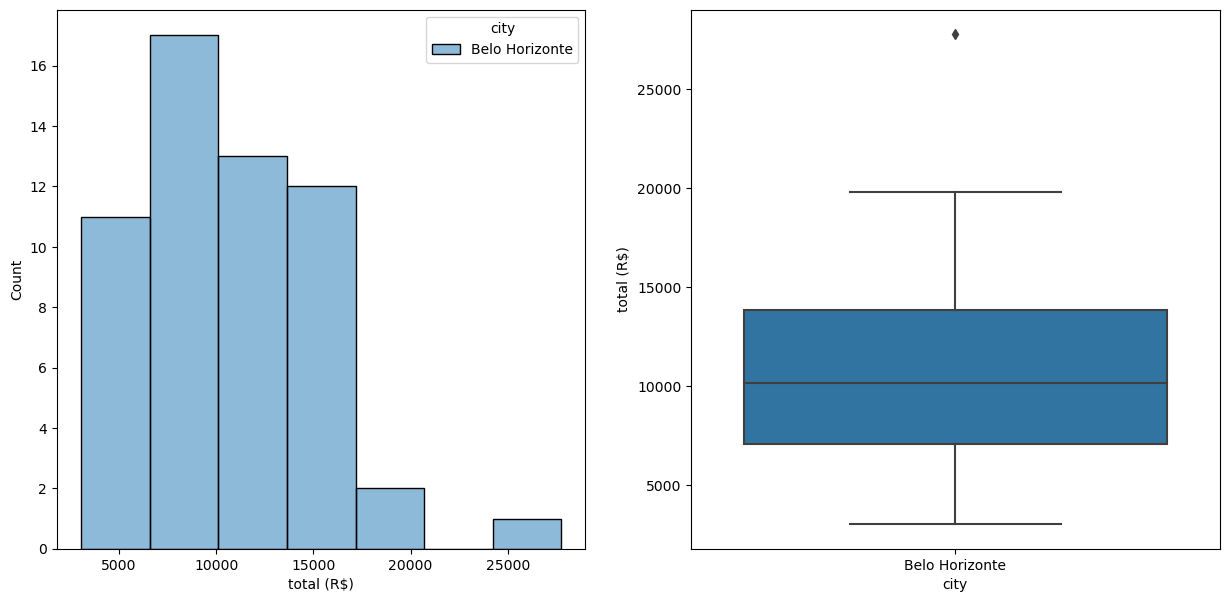

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df8["total (R$)"], hue = df8["city"], ax = ax[0])
sns.boxplot(y = df8["total (R$)"], x = df8["city"], ax = ax[1])
plt.show()

## Interpretation: The above visual shows the most of the flats with more than 3 rooms in 'Belo Horizonte' are in range 4500 to 15000

In [27]:
df9=df[(df['rooms'] > 3)&(df['bathroom'] >2)&(df['parking spaces']> 1)&(df['furniture']=='furnished')&(df['city']=='Campinas')]
df9

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
1334,Campinas,650,5,4,8,0,acept,furnished,0,8500,442,128,9070
3548,Campinas,260,4,3,4,0,acept,furnished,600,5830,596,88,7114
3685,Campinas,450,4,5,4,0,acept,furnished,0,6500,230,98,6828
4841,Campinas,219,4,5,2,4,acept,furnished,1954,3800,472,49,6275
9694,Campinas,136,4,5,3,6,acept,furnished,1253,3579,218,46,5096
9786,Campinas,238,4,5,4,10,acept,furnished,1800,5000,421,64,7285
9989,Campinas,295,7,6,4,0,not acept,furnished,0,6200,334,94,6628


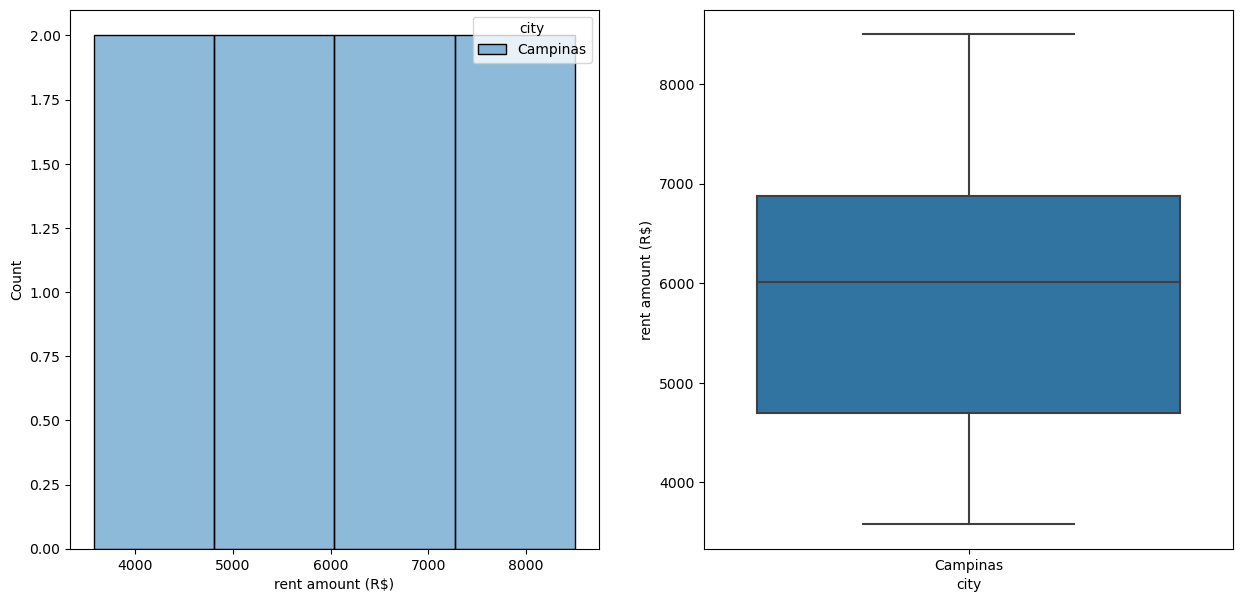

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df9["rent amount (R$)"], hue = df9["city"], ax = ax[0])
sns.boxplot(y = df9["rent amount (R$)"], x = df9["city"], ax = ax[1])
plt.show()

 ## Interpretation:The above visual shows the most of the flats with more than 3 rooms in 'Campinas' are in range 3579 to 8500

# Conclusion : Among the three cities the most suitable city for a large-size family is  'Belo Horizonte' as the count of houses with more than 3 rooms, more than 2 bathrooms, fully furnished and more than 1 parking space are more as compare to the other cities i.e, there are 11 houses at approximately a least rent of 4500.